# Foundations of AI basics

We will talk about embeddings used largely for analysis of data and in language models as well.



For the code (if run locally on computer and not in colab) we recommend creating a virtual environment before using new packages to avoid
conflict between package versions


To read more on specific types of embeddings you can visit this resource - https://umap-learn.readthedocs.io/en/latest/basic_usage.html

In [3]:
#!pip install umap
## conda install umap



In [4]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sns.set(style='white', context='notebook', rc={'figure.figsize':(6,4)})

# Load the data
Data from the online resource.

In [5]:
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
penguins.head()
# print(len(penguins))

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
penguins = penguins.dropna()
penguins.species_short.value_counts()

,count
species_short,
Adelie,146
Gentoo,120
Chinstrap,68


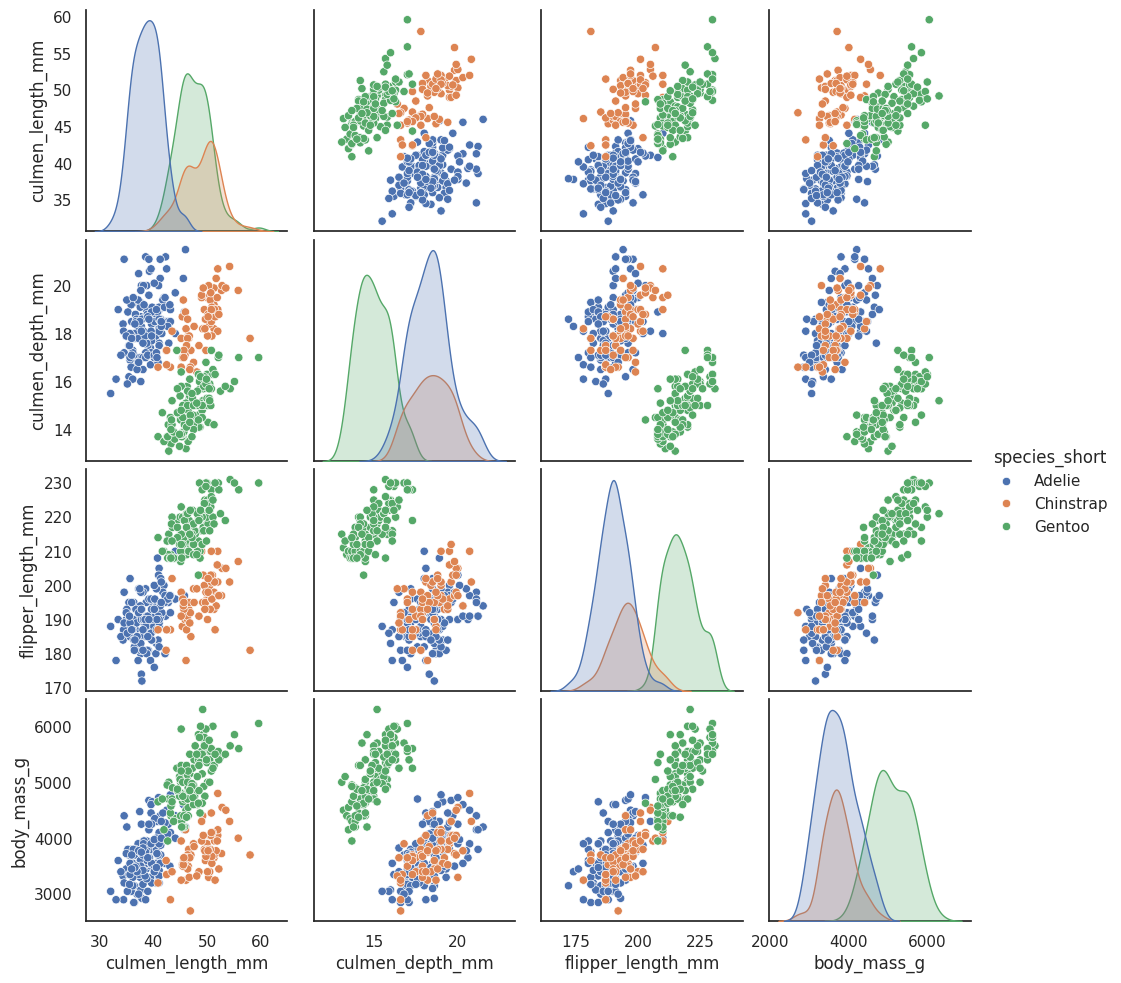

In [7]:
sns.pairplot(penguins, hue='species_short')

In [8]:
#!pip install umap
#import umap

In [ ]:
#reducer = umap.UMAP()

# reducer2 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
#      force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
#      local_connectivity=1.0, low_memory=False, metric='euclidean',
#      metric_kwds=None, min_dist=0.6, n_components=2, n_epochs=None,
#      n_neighbors=25, negative_sample_rate=5, output_metric='euclidean',
#      output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
#      set_op_mix_ratio=1.0, spread=4.0, target_metric='categorical',
#      target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
#      transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

# Data features

Let us look at which data features there are and how to work with them?
There are more than 3 features, so it may be good to map them into 2 dimensions before to visualise them.

In [9]:
penguin_data = penguins[
    [
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values

scaled_penguin_data = StandardScaler().fit_transform(penguin_data)


In [10]:
scaled_penguin_data.shape

(334, 4)

In [9]:
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing._data:

class StandardScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance.
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual feat

Make sure that you managed to install the right UMAP embedding.

In [11]:
!pip uninstall umap

!pip install umap-learn

#And then in your python code make sure you are importing the module using:


Found existing installation: umap 0.1.1
Uninstalling umap-0.1.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/umap-0.1.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/umap/*
Proceed (Y/n)? y
  Successfully uninstalled umap-0.1.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00


KeyboardInterrupt: 

In [1]:

import umap.umap_ as umap


In [11]:
embedding = umap.UMAP(random_state=42).fit_transform(scaled_penguin_data)
embedding.shape



/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(334, 2)

# Plotting the embedding data

Now each point is our datapoint. We can see how they are clustered together if there are MORE than just 2 features.

Text(0.5, 1.0, 'UMAP projection of the Penguin dataset')

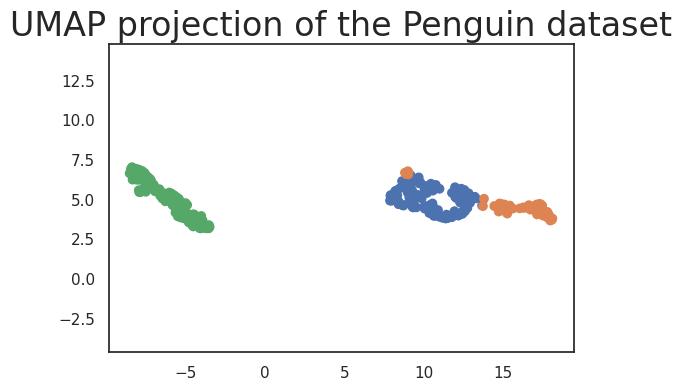

In [12]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of the Penguin dataset')

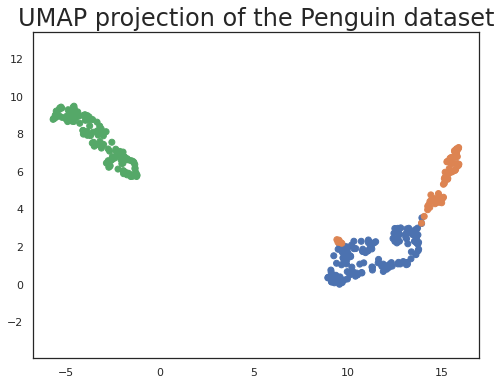

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)

# Auxillary cells (not obligatory to run them)

## UMAP methods for clustering

Now let’s set up the plotting and grab the data we’ll be using – in this case the MNIST handwritten digits dataset.
MNIST consists of 28x28 pixel grayscale images of handwritten digits (0 through 9). These can be unraveled such that each digit is described by a 784 dimensional vector (the gray scale value of each pixel in the image). Ideally we would like the clustering to recover the digit structure.




In [13]:
!pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 38.8 MB/s eta 0:00:00


In [14]:


from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score





/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


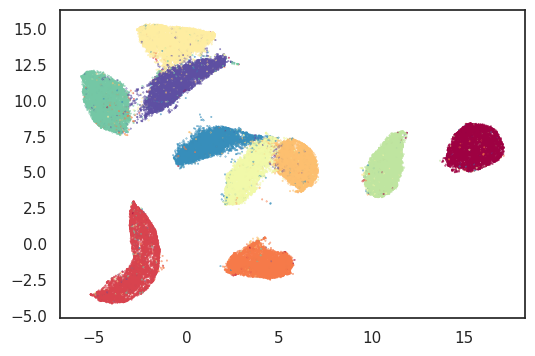

In [15]:



mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(int)

print('MNIST data loaded')

#For visualization purposes we can reduce the data to 2-dimensions using UMAP. When we cluster the data in high dimensions we can visualize the result of that clustering. First, however, we’ll view the data colored by the digit that each data point represents – we’ll use a different color for each digit. This will help frame what follows.



standard_embedding = umap.UMAP(random_state=42).fit_transform(mnist.data)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=mnist.target.astype(int), s=0.1, cmap='Spectral');



## Node2vec method for embedding the data

 - Is a Graph Embedding Algorithm
 - why we need it ?

 #### paper - https://arxiv.org/abs/1607.00653

## Fundamentals

 - works on the word2vec Skip Gram model
 - The only difference is that here instead of word vectors you have node vectors to feed into the SKIP Gram model

#### Schematic of the algo

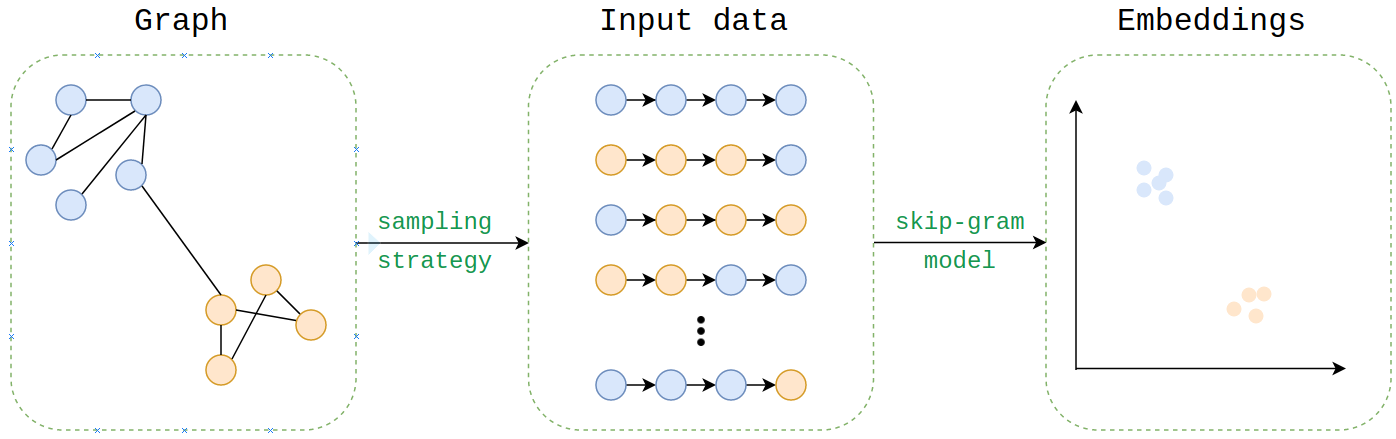

In [ ]:
from IPython.display import Image
Image(filename= "node2vec2.png", width=900, height=500)

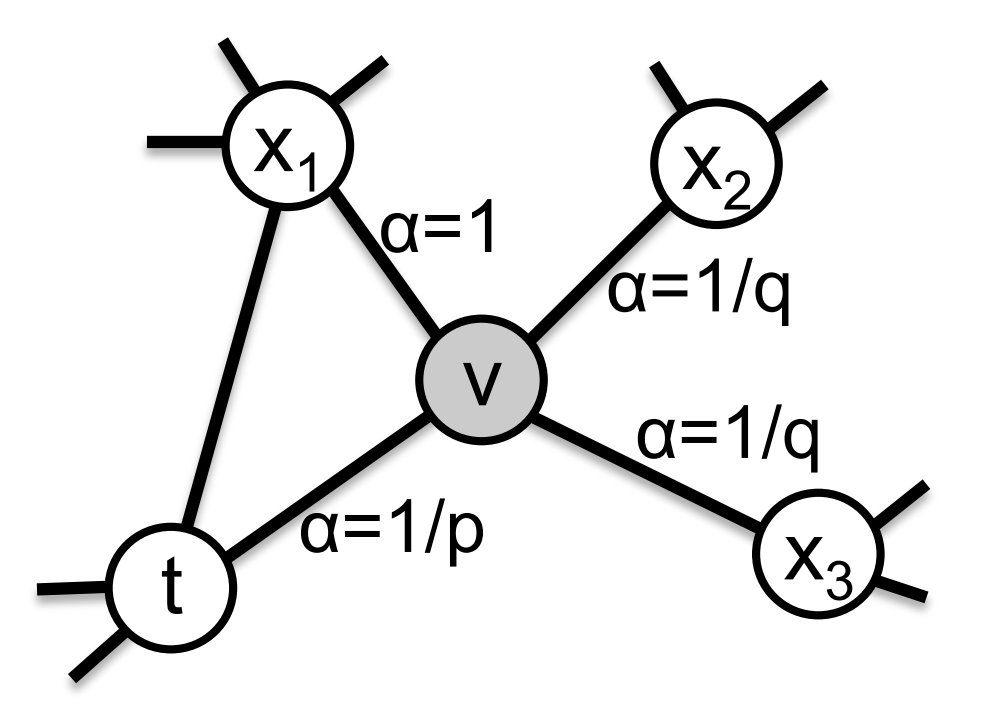

In [ ]:
Image(filename= "node2vec.png", width=600, height=400)

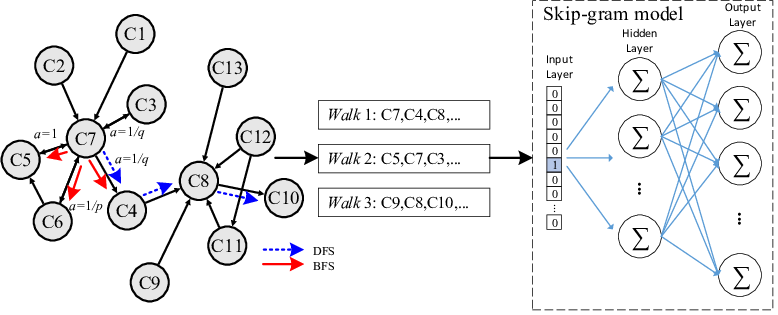

In [ ]:
Image(filename= "node2vec3.png", width=900, height=500)

In [ ]:
import networkx as nx
import nodevectors

## Let's try our own

In [ ]:
## We will use a known social network

import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
G = nx.generators.social.les_miserables_graph()

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities
comms = list(greedy_modularity_communities(G))

In [ ]:
sorted(comms)

[frozenset({'Brevet',
            'Champmathieu',
            'Champtercier',
            'Chenildieu',
            'Cochepaille',
            'Count',
            'CountessDeLo',
            'Cravatte',
            'Fauchelevent',
            'Geborand',
            'Gervais',
            'Gribier',
            'Isabeau',
            'Judge',
            'Labarre',
            'Marguerite',
            'MlleBaptistine',
            'MmeDeR',
            'MmeMagloire',
            'MotherInnocent',
            'Myriel',
            'Napoleon',
            'OldMan',
            'Scaufflaire',
            'Valjean',
            'Woman1'}),
 frozenset({'Bahorel',
            'Bossuet',
            'Child1',
            'Child2',
            'Combeferre',
            'Courfeyrac',
            'Enjolras',
            'Feuilly',
            'Gavroche',
            'Grantaire',
            'Joly',
            'Jondrette',
            'Mabeuf',
            'MmeBurgon',
            'MmeHuchelou

In [ ]:
## you can use color brewer for creating colors

color_pallette = ['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0']


ncolor = {}
for n in G.nodes:

    if n in comms[0]:
        ncolor[n] = (color_pallette[0])
    if n in comms[1]:
        ncolor[n] = (color_pallette[1])
    if n in comms[2]:
        ncolor[n] = (color_pallette[2])
    if n in comms[3]:
        ncolor[n] = (color_pallette[3])
    if n in comms[4]:
        ncolor[n] = (color_pallette[4])


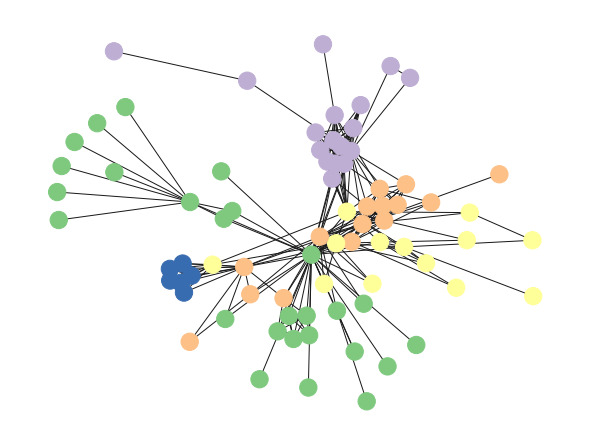

In [ ]:
nx.draw(G,node_color=ncolor.values())

https://github.com/VHRanger/nodevectors

In [ ]:
from nodevectors import Node2Vec

features = 15

# Fit embedding model to graph
g2v = Node2Vec(
    n_components=features,neighbor_weight=2,return_weight=1,
    walklen=20
)


nodeVector_embed = g2v.fit(G)

Making walks... Done, T=0.24
Mapping Walk Names... Done, T=0.03
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=0.31


In [ ]:
M = np.zeros((len(G.nodes),features))

for i,n in enumerate(G.nodes()):
    M[i][:] = g2v.predict(n)

In [ ]:
u = umap.UMAP(n_components=2, min_dist=0.8,n_neighbors=15)
pos = u.fit_transform(M)

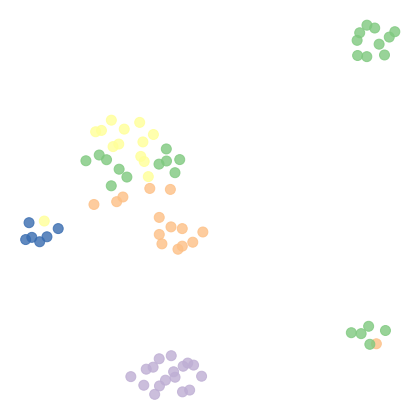

In [ ]:
fig = plt.figure(figsize=(6,6))
plt.scatter(pos[:,0], pos[:,1], s=100,alpha=0.8,color=list(ncolor.values()))
plt.axis('off')
plt.tight_layout()

In [ ]:
pos.shape

(77, 2)

In [ ]:
len(ncolor)

77